Loaded predictions successfully.
Plots generated: model_diagnostics.png


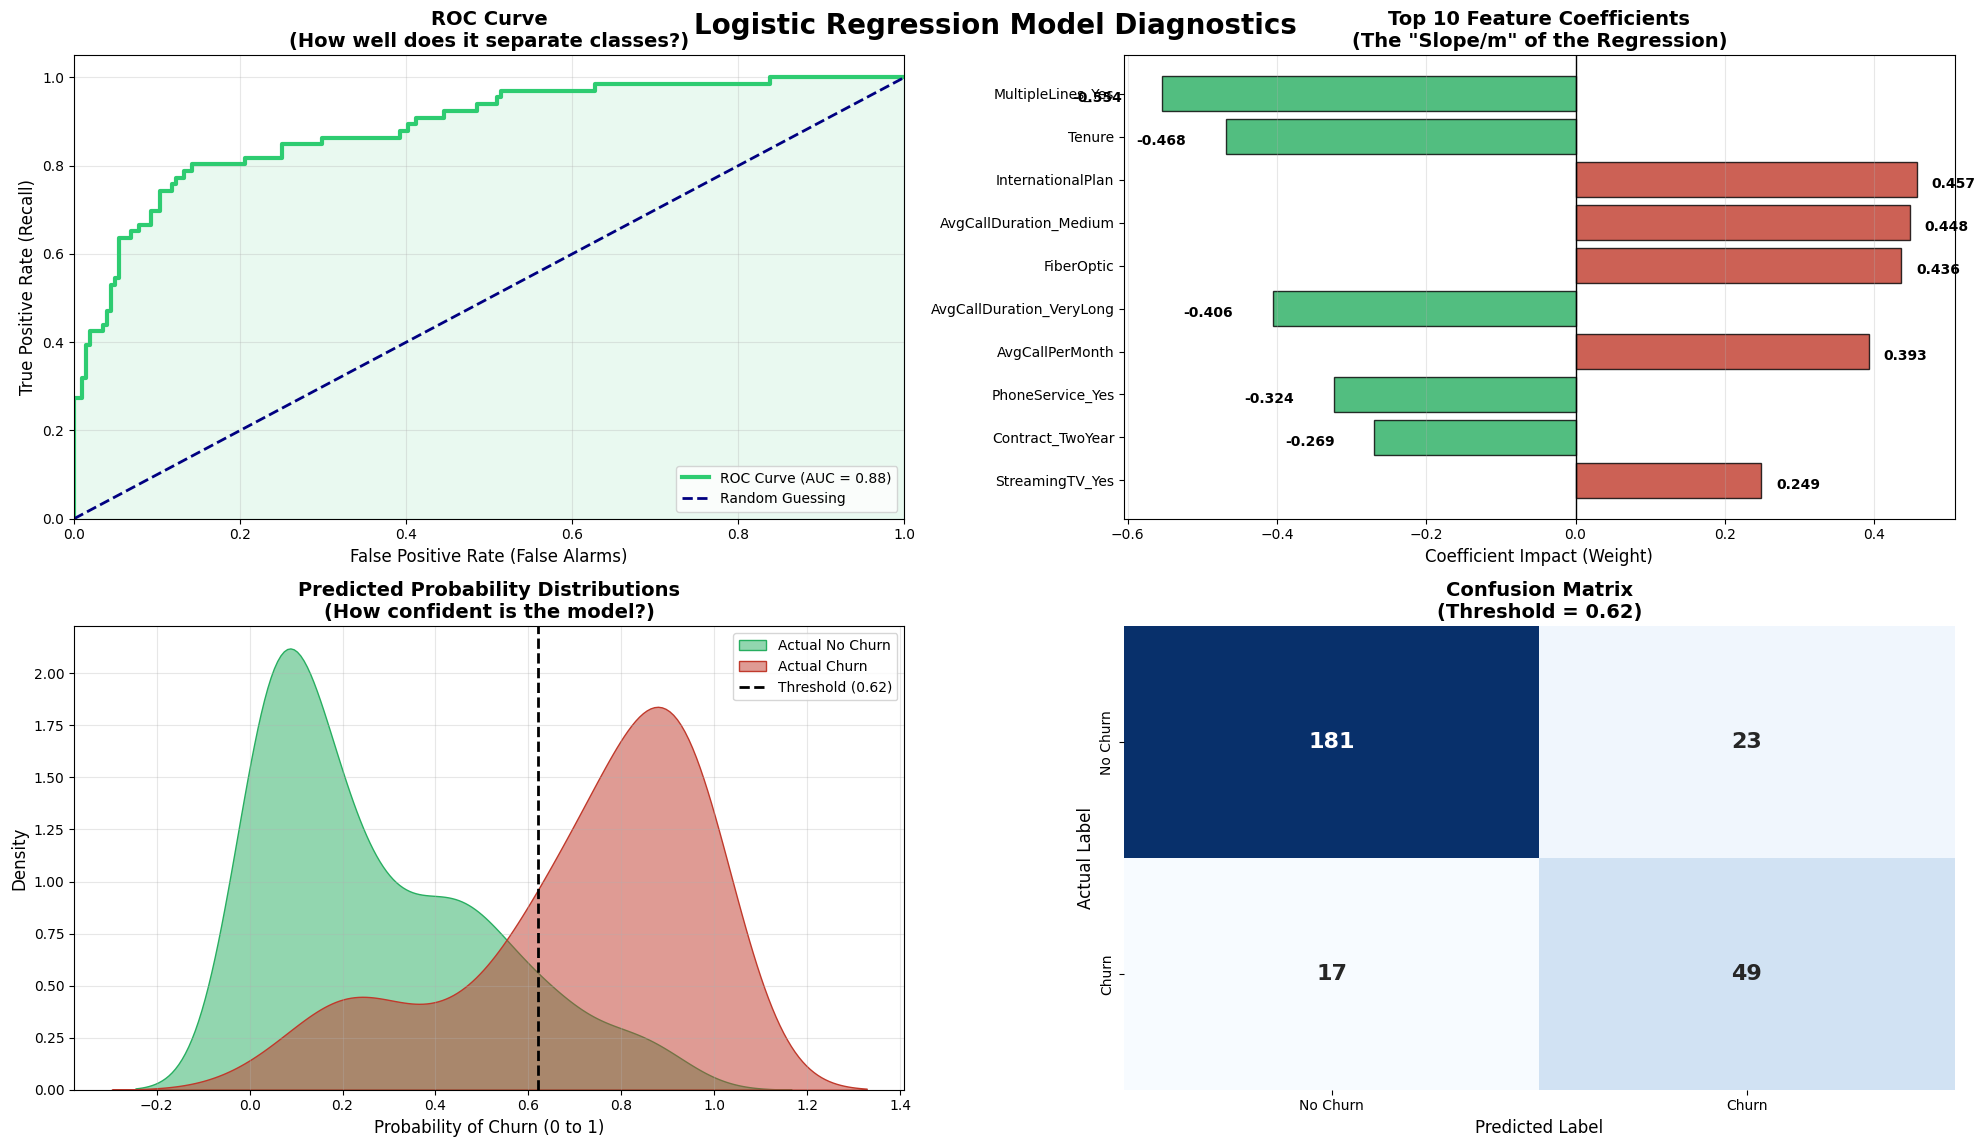

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# 1. Load the predictions data
try:
    df = pd.read_csv('../data/Churn_Test_Predictions.csv')
    print("Loaded predictions successfully.")
except FileNotFoundError:
    print("File not found. Creating dummy data for demonstration.")
   

# Setup the figure grid
fig = plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
fig.suptitle('Logistic Regression Model Diagnostics', fontsize=20, fontweight='bold', y=0.95)

# ==========================================
# PLOT 1: ROC Curve (The "Grading Scale")
# ==========================================
ax1 = plt.subplot(2, 2, 1)

# Calculate False Positive Rate (fpr) and True Positive Rate (tpr)
fpr, tpr, thresholds = roc_curve(df['Actual_Churn'], df['Predicted_Probability'])
roc_auc = auc(fpr, tpr)

# Plot the curve
ax1.plot(fpr, tpr, color='#2ecc71', lw=3, label=f'ROC Curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')

# Styling
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate (False Alarms)', fontsize=12)
ax1.set_ylabel('True Positive Rate (Recall)', fontsize=12)
ax1.set_title('ROC Curve\n(How well does it separate classes?)', fontsize=14, fontweight='bold')
ax1.legend(loc="lower right")
ax1.grid(True, alpha=0.3)
ax1.fill_between(fpr, tpr, alpha=0.1, color='#2ecc71')

# ==========================================
# PLOT 2: Feature Importance (The "Coefficients / m")
# ==========================================
# Note: Since we don't have the live model object here, we construct this 
# from the text output you provided in the prompt.
ax2 = plt.subplot(2, 2, 2)

features = [
    'MultipleLines_Yes', 'Tenure', 'InternationalPlan', 
    'AvgCallDuration_Medium', 'FiberOptic', 'AvgCallDuration_VeryLong',
    'AvgCallPerMonth', 'PhoneService_Yes', 'Contract_TwoYear', 'StreamingTV_Yes'
]
# Negative = Reduces Churn (Green), Positive = Increases Churn (Red)
coefficients = [-0.5541, -0.4678, 0.4571, 0.4477, 0.4361, -0.4059, 0.3929, -0.3240, -0.2693, 0.2488]
colors = ['#27ae60' if c < 0 else '#c0392b' for c in coefficients]

# Create horizontal bar chart
y_pos = np.arange(len(features))
ax2.barh(y_pos, coefficients, color=colors, edgecolor='black', alpha=0.8)
ax2.set_yticks(y_pos)
ax2.set_yticklabels(features)
ax2.invert_yaxis()  # Labels read top-to-bottom
ax2.set_xlabel('Coefficient Impact (Weight)', fontsize=12)
ax2.set_title('Top 10 Feature Coefficients\n(The "Slope/m" of the Regression)', fontsize=14, fontweight='bold')
ax2.axvline(0, color='black', linewidth=1)
ax2.grid(True, axis='x', alpha=0.3)

# Add text labels
for i, v in enumerate(coefficients):
    position = v + 0.02 if v > 0 else v - 0.12
    ax2.text(position, i + 0.2, str(round(v, 3)), color='black', fontweight='bold')

# ==========================================
# PLOT 3: Probability Distribution (The "Logistic" Separation)
# ==========================================
ax3 = plt.subplot(2, 2, 3)

# Separate the data
churn_probs = df[df['Actual_Churn'] == 1]['Predicted_Probability']
no_churn_probs = df[df['Actual_Churn'] == 0]['Predicted_Probability']

# Plot histograms/KDE
sns.kdeplot(no_churn_probs, color='#27ae60', fill=True, label='Actual No Churn', ax=ax3, alpha=0.5)
sns.kdeplot(churn_probs, color='#c0392b', fill=True, label='Actual Churn', ax=ax3, alpha=0.5)

# Mark the threshold
optimal_threshold = 0.62
ax3.axvline(optimal_threshold, color='black', linestyle='--', linewidth=2, label=f'Threshold ({optimal_threshold})')

ax3.set_title('Predicted Probability Distributions\n(How confident is the model?)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Probability of Churn (0 to 1)', fontsize=12)
ax3.set_ylabel('Density', fontsize=12)
ax3.legend()
ax3.grid(True, alpha=0.3)

# ==========================================
# PLOT 4: Confusion Matrix (The "Results")
# ==========================================
ax4 = plt.subplot(2, 2, 4)

# Create predictions based on the optimal threshold
df['Predicted_Label'] = (df['Predicted_Probability'] >= optimal_threshold).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(df['Actual_Churn'], df['Predicted_Label'])

# Plot heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax4, 
            annot_kws={'size': 16, 'weight': 'bold'}, cbar=False)

ax4.set_title(f'Confusion Matrix\n(Threshold = {optimal_threshold})', fontsize=14, fontweight='bold')
ax4.set_xlabel('Predicted Label', fontsize=12)
ax4.set_ylabel('Actual Label', fontsize=12)
ax4.set_xticklabels(['No Churn', 'Churn'])
ax4.set_yticklabels(['No Churn', 'Churn'])

# Save and Show
plt.tight_layout()
plt.savefig('model_diagnostics.png')
print("Plots generated: model_diagnostics.png")
plt.show()